# Libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Parameters & Directories

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams["font.style"] = "normal"
plt.rcParams["axes.labelcolor"] = "gray"
plt.rcParams["text.color"] = "grey"
pd.set_option('mode.chained_assignment', None)

In [3]:
DIR = os.path.dirname(os.getcwd()) + "/"
DATA = DIR + 'data/'
FIG = DIR + 'reports/figures/'

# Read in Data

In [4]:
states_df = pd.read_csv(DATA + "processed/" + "pro_19cStates.csv")
states_df.shape

(1854, 133)

# Set Globals

In [5]:
# Development of states
DEV_STATE = ['sy_gdp',
             'sy_urban',
             'sy_lifeex',
             'sy_suffrage',
            ]

# Conflict
CONFLICT = ['sy_war',
            'sy_riots'
           ]


# Nationalization of states 
NAT_STATE = [
             'sy_anthem',
             'sy_xtr_enrll',
             'sy_citizenship',
             'sy_nat_bank',
             'sy_dom_autonomy',
             'sy_int_autonomy', 
             'sy_flag'
            ]


# Scientization of states
SCI_STATE = ['sy_stats_agency',
             'sy_yrbk_cov',
             'sy_yrbk_pub',
             'sy_unis',
             'sy_acad_free', 
             'sy_census_cum', 
             'sy_confs_sci_ref',
            ]

# Degree of nationalization of states, worldwide
NAT_WORLD = [
             'wy_anthem',
             'wy_xtr_enrll',
             'wy_citizenship',
             'wy_nat_bank',
             'wy_dom_autonomy',
             'wy_int_autonomy', 
             'wy_flag'    
            ]

# Degree of scientization of states, worldwide
SCI_WORLD = ['wy_stats_agency',
             'wy_yrbk_cov',
             'wy_yrbk_pub',
             'wy_unis',
             'wy_acad_free',
             'wy_census_ever',
             'wy_confs_sci_ref',
             'wy_stats_journals',
             'wy_soc_journals',
             'wy_societies'
            ]

# Sci and nat globals
GLOBALS = {"sy_dev_state": DEV_STATE,
           "sy_nat_state": NAT_STATE,
           "sy_sci_state": SCI_STATE,
           "sy_state_mdl": NAT_STATE+SCI_STATE,
           "wy_nat_world": NAT_WORLD,
           "wy_sci_world": SCI_WORLD,
           "wy_state_mdl": NAT_WORLD+SCI_WORLD,
          }

ALL = DEV_STATE + NAT_STATE + SCI_STATE + NAT_WORLD + SCI_WORLD + CONFLICT

In [6]:
states_df[NAT_WORLD].describe()

,wy_anthem,wy_xtr_enrll,wy_citizenship,wy_nat_bank,wy_dom_autonomy,wy_int_autonomy,wy_flag
count,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000
mean,0.483350,48.885173,0.751479,0.442713,0.751296,0.465658,0.898212
std,0.169197,16.299751,0.181587,0.187808,0.262690,0.365880,0.060074
min,0.121212,19.768108,0.304348,0.129032,0.102531,-0.584594,0.705882
25%,0.341463,33.792905,0.555556,0.256410,0.562700,0.260974,0.860465
50%,0.487179,48.360500,0.840000,0.435897,0.698825,0.411250,0.878049
75%,0.640000,64.663917,0.920000,0.640000,1.008640,0.767280,0.960000
max,0.720000,72.261667,0.960000,0.760000,1.190808,0.998154,0.960000


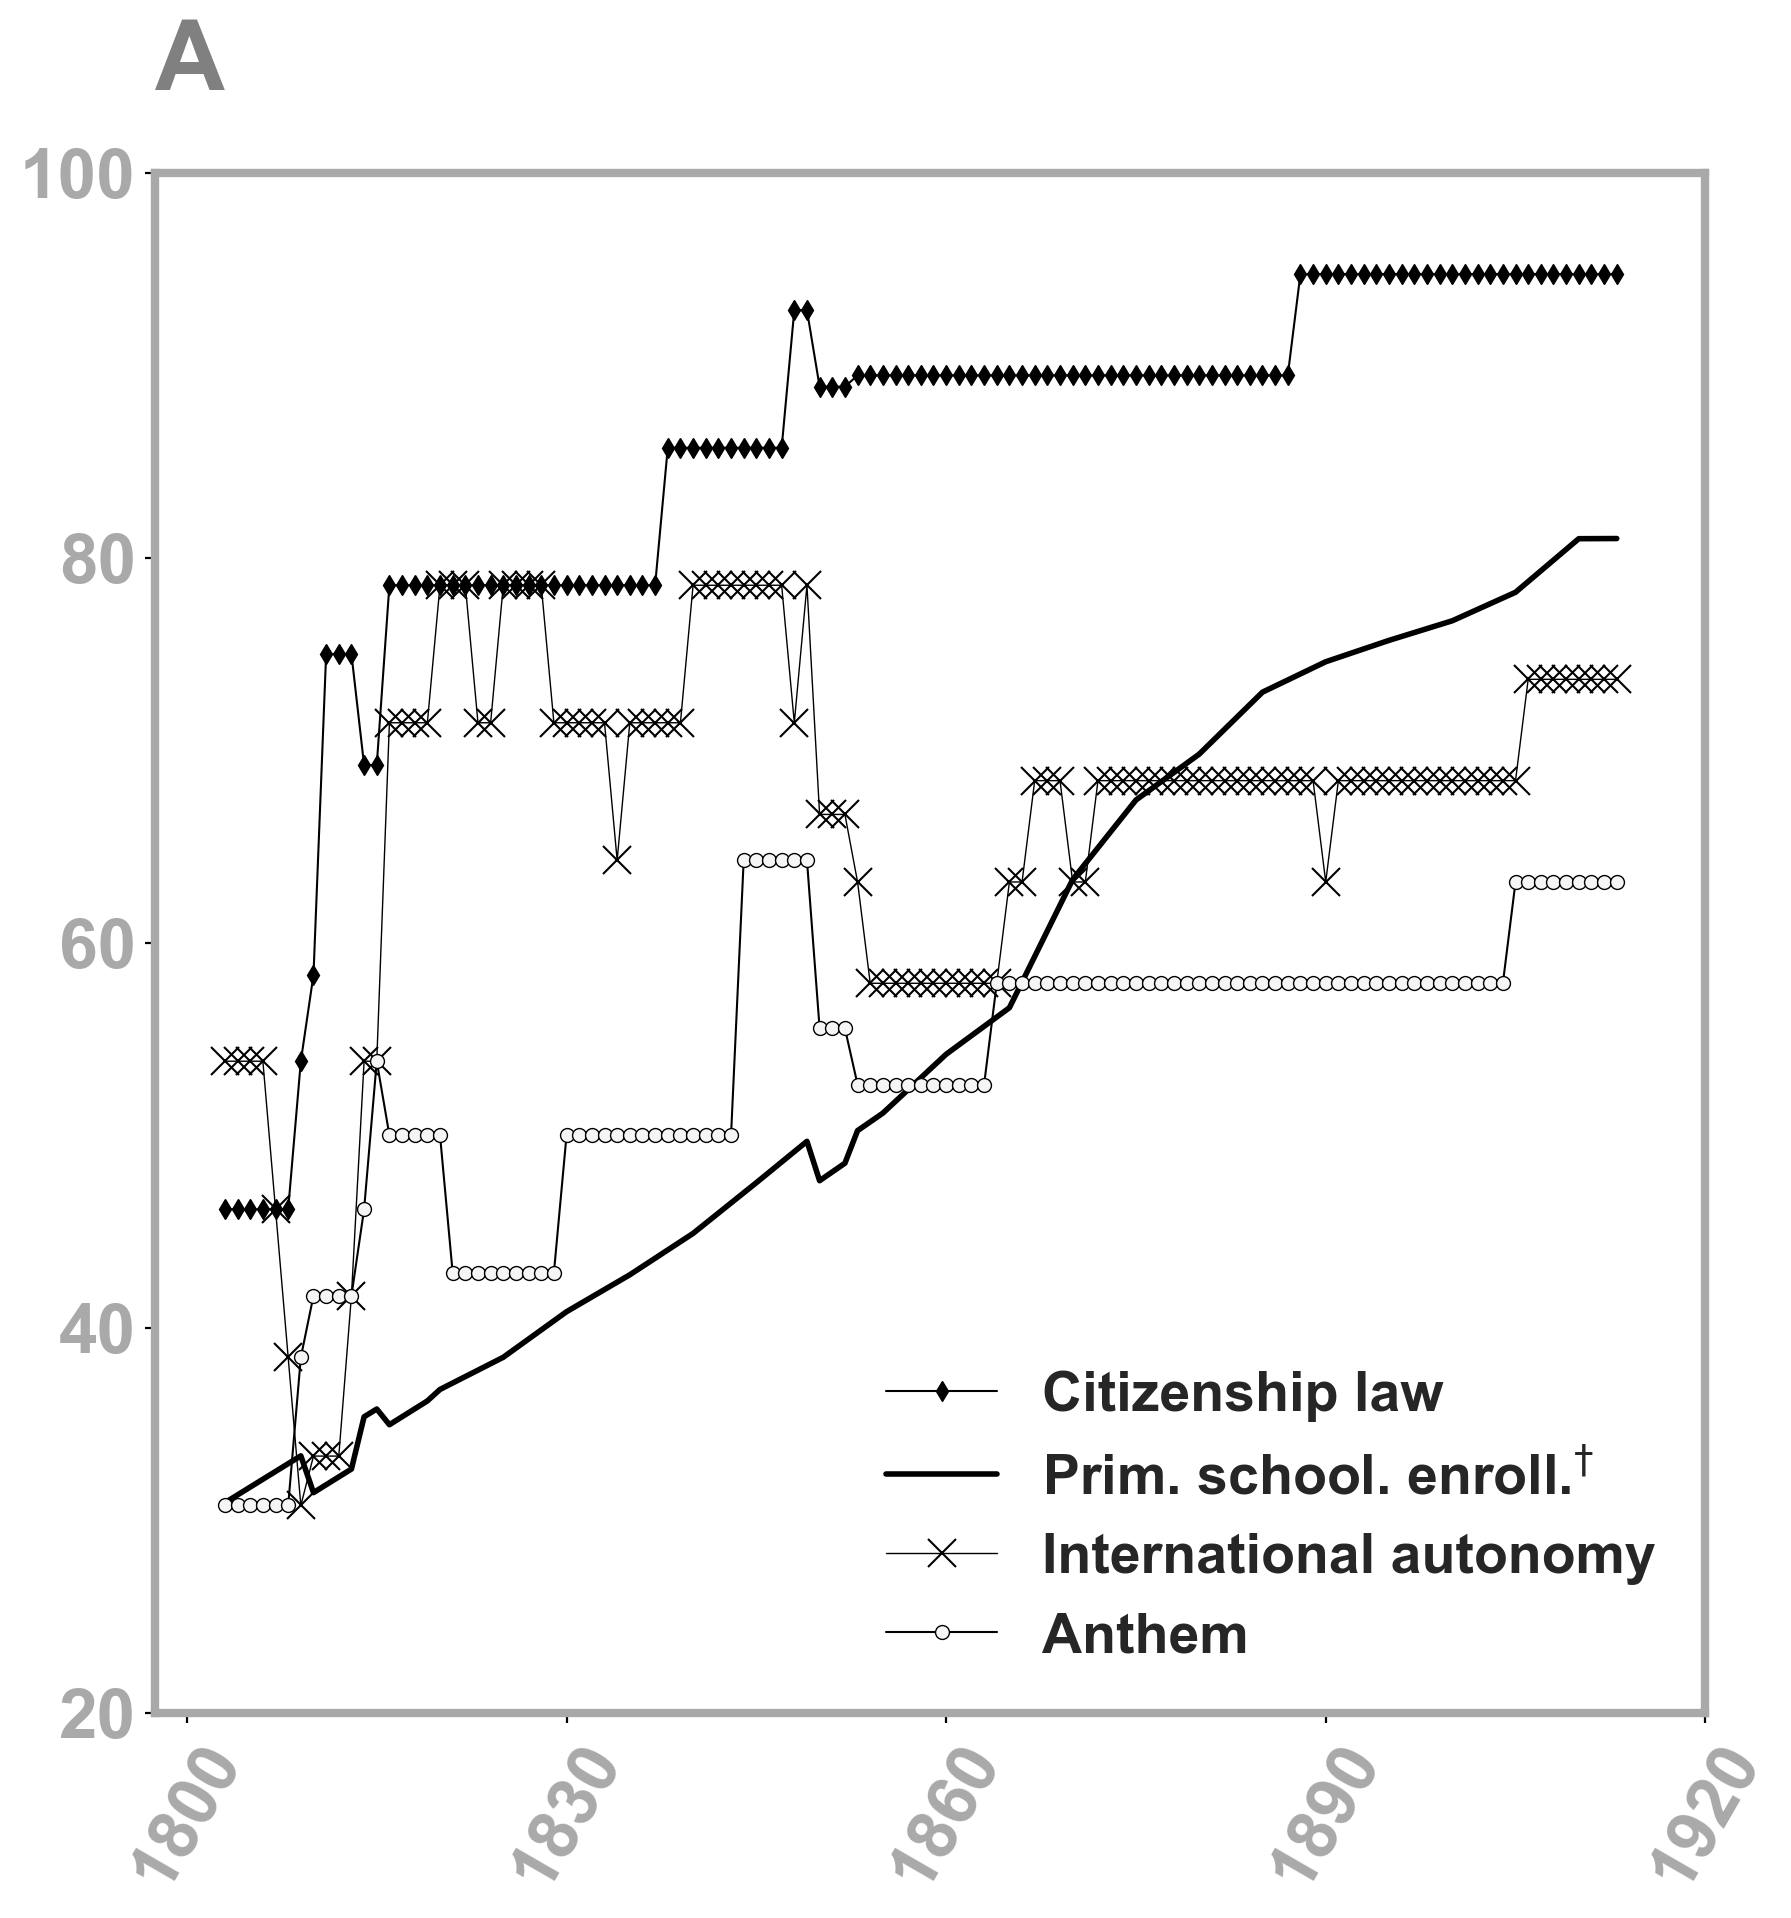

In [7]:
title_color, tick_color, edge_color, data_color = 'black', 'darkgray', 'dimgray', 'whitesmoke'
fig, ax = plt.subplots()
plt.style.use('seaborn-white')
plt.setp(ax.spines.values(), color=tick_color, lw=3)
font_size = 25
font_weight = "bold"

plt.title("A", fontsize=35, weight=font_weight, loc='left', pad=30)

plt.plot(sorted(states_df['year'].unique()), 
         states_df.groupby('year')['sy_citizenship'].mean()*100,
         lw=.75, 
         marker='d', 
         color=title_color, 
         markersize=5, 
         markeredgewidth=.5, 
         markeredgecolor=title_color,
        )
plt.plot(sorted(states_df['year'].unique()), 
         states_df.groupby('year')['sy_xtr_enrll'].mean(),
         lw=2, 
         marker=None, 
         color=title_color,
        )
plt.plot(sorted(states_df['year'].unique()), 
         states_df.groupby('year')['sy_int_autonomy_b'].mean()*100, 
         lw=.5, 
         marker='x', 
         color=title_color, 
         markersize=10, 
         markeredgewidth=.75, 
         markeredgecolor=title_color, 
         markerfacecolor=data_color,
        )
plt.plot(sorted(states_df['year'].unique()), 
         states_df.groupby('year')['sy_anthem'].mean()*100, 
         lw=.75, 
         marker='o', 
         color=title_color, 
         markersize=5, 
         markeredgewidth=.5, 
         markeredgecolor=title_color, 
         markerfacecolor=data_color,
        )
plt.xticks(range(1800,1921, 30),
           fontsize=25,
           color=tick_color, 
           weight=font_weight,
          rotation = 60);

plt.yticks(range(20,101, 20),
           fontsize=25, 
           color=tick_color, 
           weight=font_weight);

plt.legend(['Citizenship law', 
            'Prim. school. enroll.$^{†}$',
            'International autonomy',
            'Anthem'],
          loc='lower right',
          prop={'size': 20, 'weight': 'bold'});

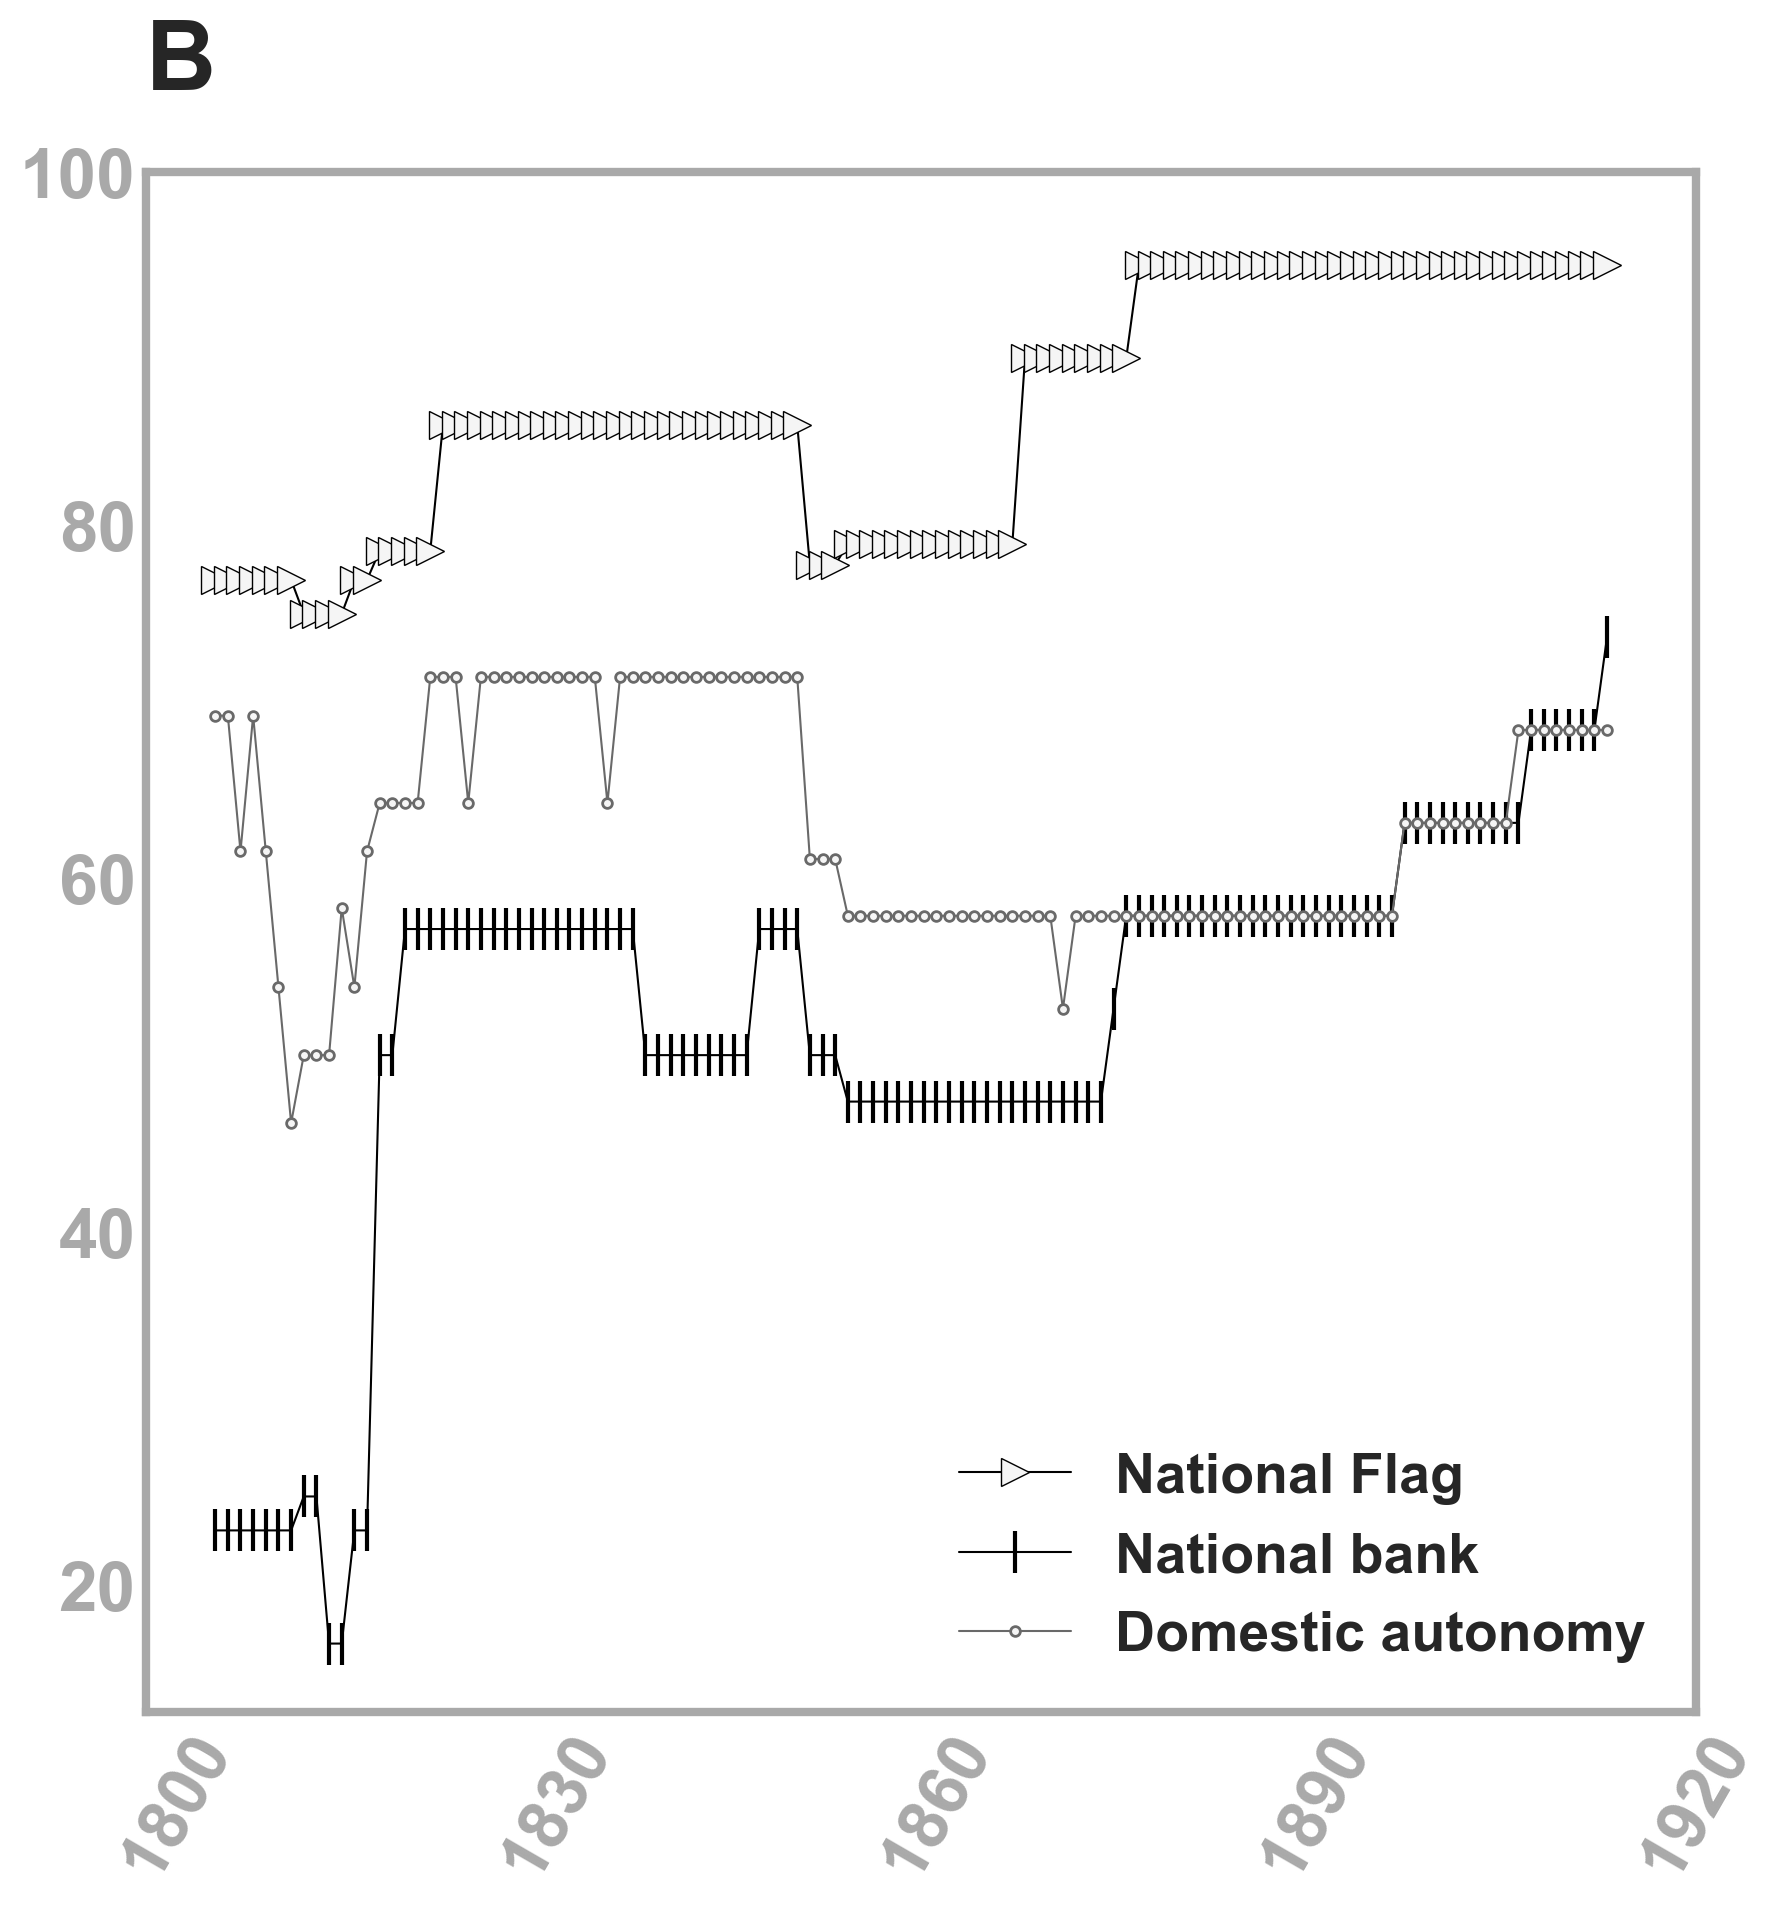

In [8]:
title_color, tick_color, edge_color, data_color = 'black', 'darkgray', 'dimgray', 'whitesmoke'
fig, ax = plt.subplots()
plt.style.use('seaborn-white')
plt.setp(ax.spines.values(), color=tick_color, lw=3)
font_size = 25
font_weight = "bold"

plt.title("B", fontsize=35, weight=font_weight, loc='left', pad=30)
plt.plot(sorted(states_df['year'].unique()), 
         states_df.groupby('year')['sy_flag'].mean()*100,
         lw=.75, 
         marker='>', 
         color=title_color, 
         markersize=10, 
         markeredgewidth=.5, 
         markeredgecolor=title_color,
         markerfacecolor=data_color,
        )

plt.plot(sorted(states_df['year'].unique()), 
         states_df.groupby('year')['sy_nat_bank'].mean()*100,
         lw=.75, 
         marker='|', 
         color=title_color, 
         markersize=15, 
         markeredgewidth=1.5, 
         markeredgecolor=title_color,
         markerfacecolor="None",
        )
plt.plot(sorted(states_df['year'].unique()), 
         states_df.groupby('year')['sy_dom_autonomy_b'].mean()*100,
         lw=.75, 
         marker='o', 
         color=edge_color, 
         markersize=3.5, 
         markeredgewidth=1, 
         markeredgecolor=edge_color, 
         markerfacecolor=data_color,
        )
plt.xticks(range(1800,1921, 30),
           fontsize=25,
           color=tick_color, 
           weight=font_weight,
          rotation = 60);

plt.yticks(range(20,101, 20),
           fontsize=25, 
           color=tick_color, 
           weight=font_weight);

plt.legend(['National Flag', 
            'National bank',
            'Domestic autonomy',
            ],
          loc='lower right',
          prop={'size': 20, 'weight': 'bold'});

In [9]:
states_df[SCI_STATE].describe()

,sy_stats_agency,sy_yrbk_cov,sy_yrbk_pub,sy_unis,sy_acad_free,sy_census_cum,sy_confs_sci_ref
count,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000
mean,0.650485,0.373247,0.329558,38.772384,2.198490,6.595469,0.463862
std,0.476945,0.483797,0.470179,120.992763,1.008586,5.540539,2.208393
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,4.000000,2.000000,2.000000,0.000000
50%,1.000000,0.000000,0.000000,10.000000,2.000000,6.000000,0.000000
75%,1.000000,1.000000,1.000000,17.750000,3.000000,10.000000,0.000000
max,1.000000,1.000000,1.000000,1051.000000,4.000000,23.000000,65.000000


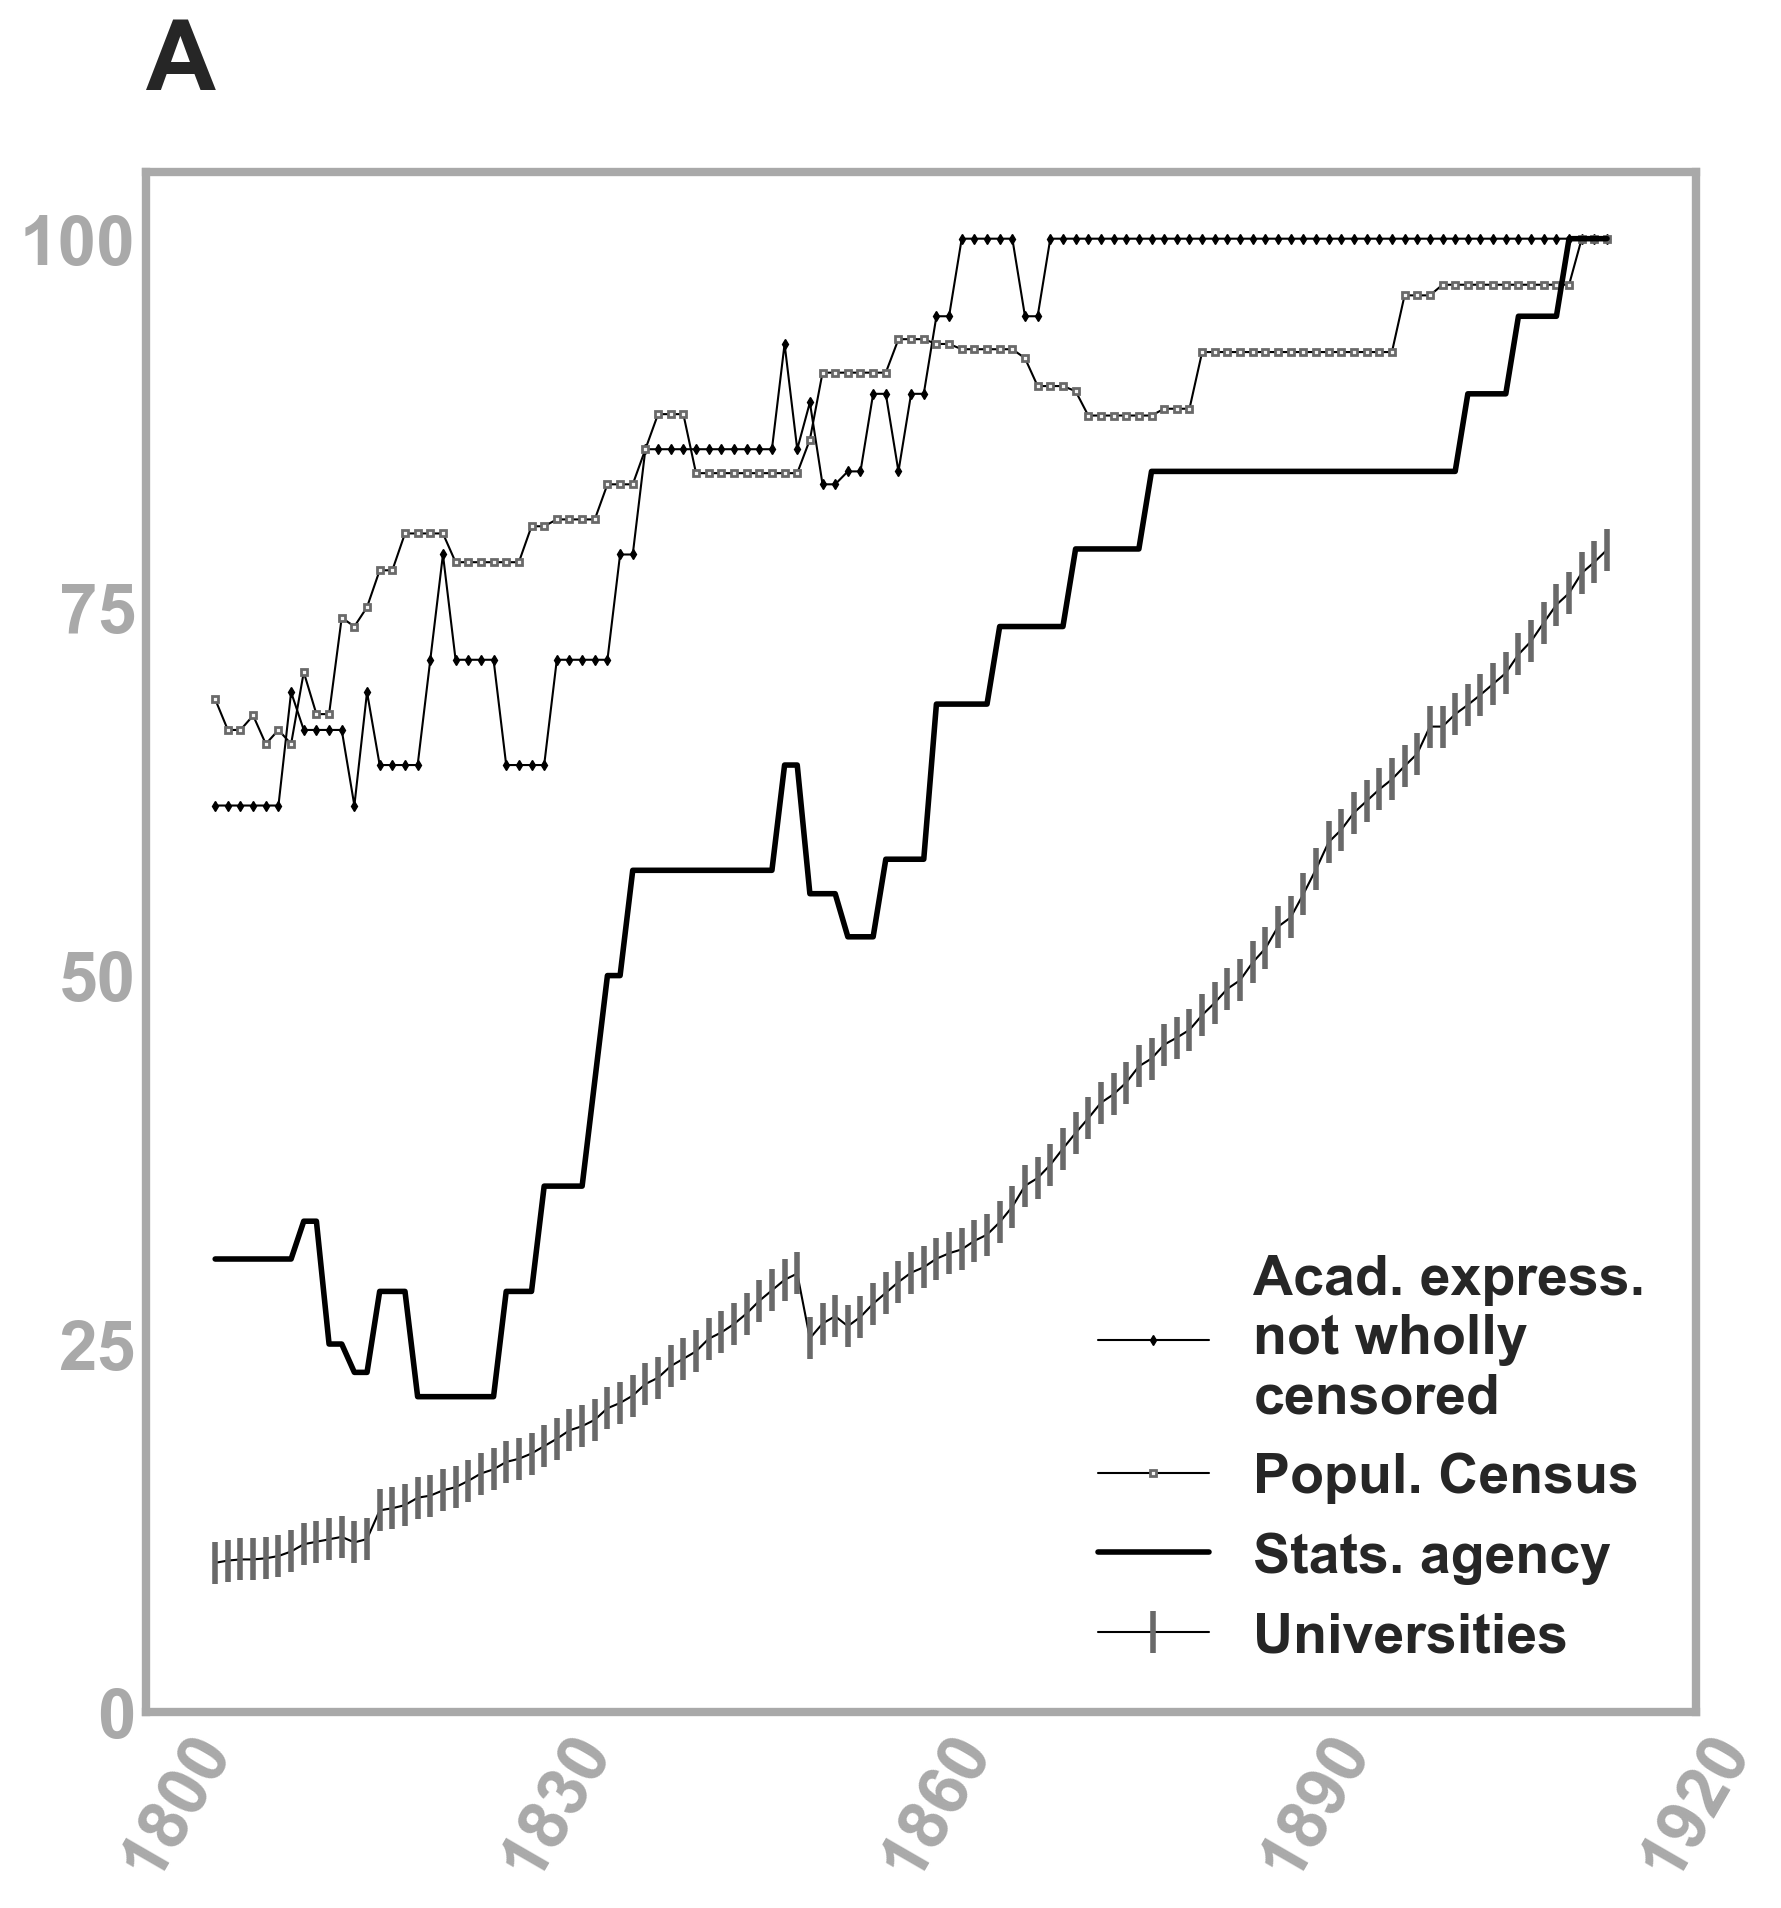

In [10]:
title_color, tick_color, edge_color, data_color = 'black', 'darkgray', 'dimgray', 'whitesmoke'
fig, ax = plt.subplots()
plt.style.use('seaborn-white')
plt.setp(ax.spines.values(), color=tick_color, lw=3)
font_size = 25
font_weight = "bold"

plt.title("A", fontsize=35, weight=font_weight, loc='left', pad=30)
plt.plot(sorted(states_df['year'].unique()), 
         states_df.groupby('year')['sy_acad_free_b'].mean()*100,
         lw=.75, 
         marker='d', 
         color=title_color, 
         markersize=2.5, 
         markeredgewidth=.5, 
         markeredgecolor=title_color,
         markerfacecolor=title_color,
        )
plt.plot(sorted(states_df['year'].unique()), 
         states_df.groupby('year')['wy_census_ever'].mean()*100,
         lw=.75, 
         marker='s', 
         color=title_color, 
         markersize=2.5, 
         markeredgewidth=1, 
         markeredgecolor=edge_color, 
         markerfacecolor=data_color,
        )
plt.plot(sorted(states_df['year'].unique()), 
         states_df.groupby('year')['sy_stats_agency'].mean()*100,
         lw=2, 
         marker=None, 
         color=title_color, 
         markersize=10, 
         markeredgewidth=1, 
         markeredgecolor=title_color, 
        )
plt.plot(sorted(states_df['year'].unique()), 
         states_df.groupby('year')['sy_unis'].mean(),
         lw=.75, 
         marker='|', 
         color=title_color, 
         markersize=15, 
         markeredgewidth=2, 
         markeredgecolor=edge_color, 
         markerfacecolor="None",
        )

plt.xticks(range(1800,1921, 30),
           fontsize=25,
           color=tick_color, 
           weight=font_weight,
          rotation = 60);

plt.yticks(range(0,101, 25),
           fontsize=25, 
           color=tick_color, 
           weight=font_weight);

plt.legend(['Acad. express.\nnot wholly\ncensored',
            'Popul. Census',
            'Stats. agency', 
            'Universities',
            'Stats. journals', 
            ],
          loc='lower right',
          prop={'size': 20, 'weight': 'bold'});

In [11]:
states_df[SCI_WORLD].describe()

,wy_stats_agency,wy_yrbk_cov,wy_yrbk_pub,wy_unis,wy_acad_free,wy_census_ever,wy_confs_sci_ref,wy_stats_journals,wy_soc_journals,wy_societies
count,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000
mean,0.613802,0.324139,0.288348,28.979443,2.006766,0.878501,9.878641,665.615965,256.409385,30.834412
std,0.256304,0.288251,0.285491,14.460560,0.425729,0.081712,14.938111,646.538054,261.125420,16.400087
min,0.190476,0.000000,0.000000,9.578947,1.225806,0.657143,0.000000,11.000000,4.000000,2.000000
25%,0.416667,0.055556,0.041667,15.434783,1.550000,0.840909,0.000000,70.000000,20.000000,20.000000
50%,0.720000,0.208333,0.130435,26.769231,2.243243,0.909091,3.000000,457.000000,166.000000,39.000000
75%,0.840000,0.608696,0.583333,43.307692,2.384615,0.925000,15.000000,1154.000000,431.000000,45.000000
max,1.000000,0.880000,0.800000,52.400000,2.482759,1.000000,72.000000,2152.000000,854.000000,48.000000


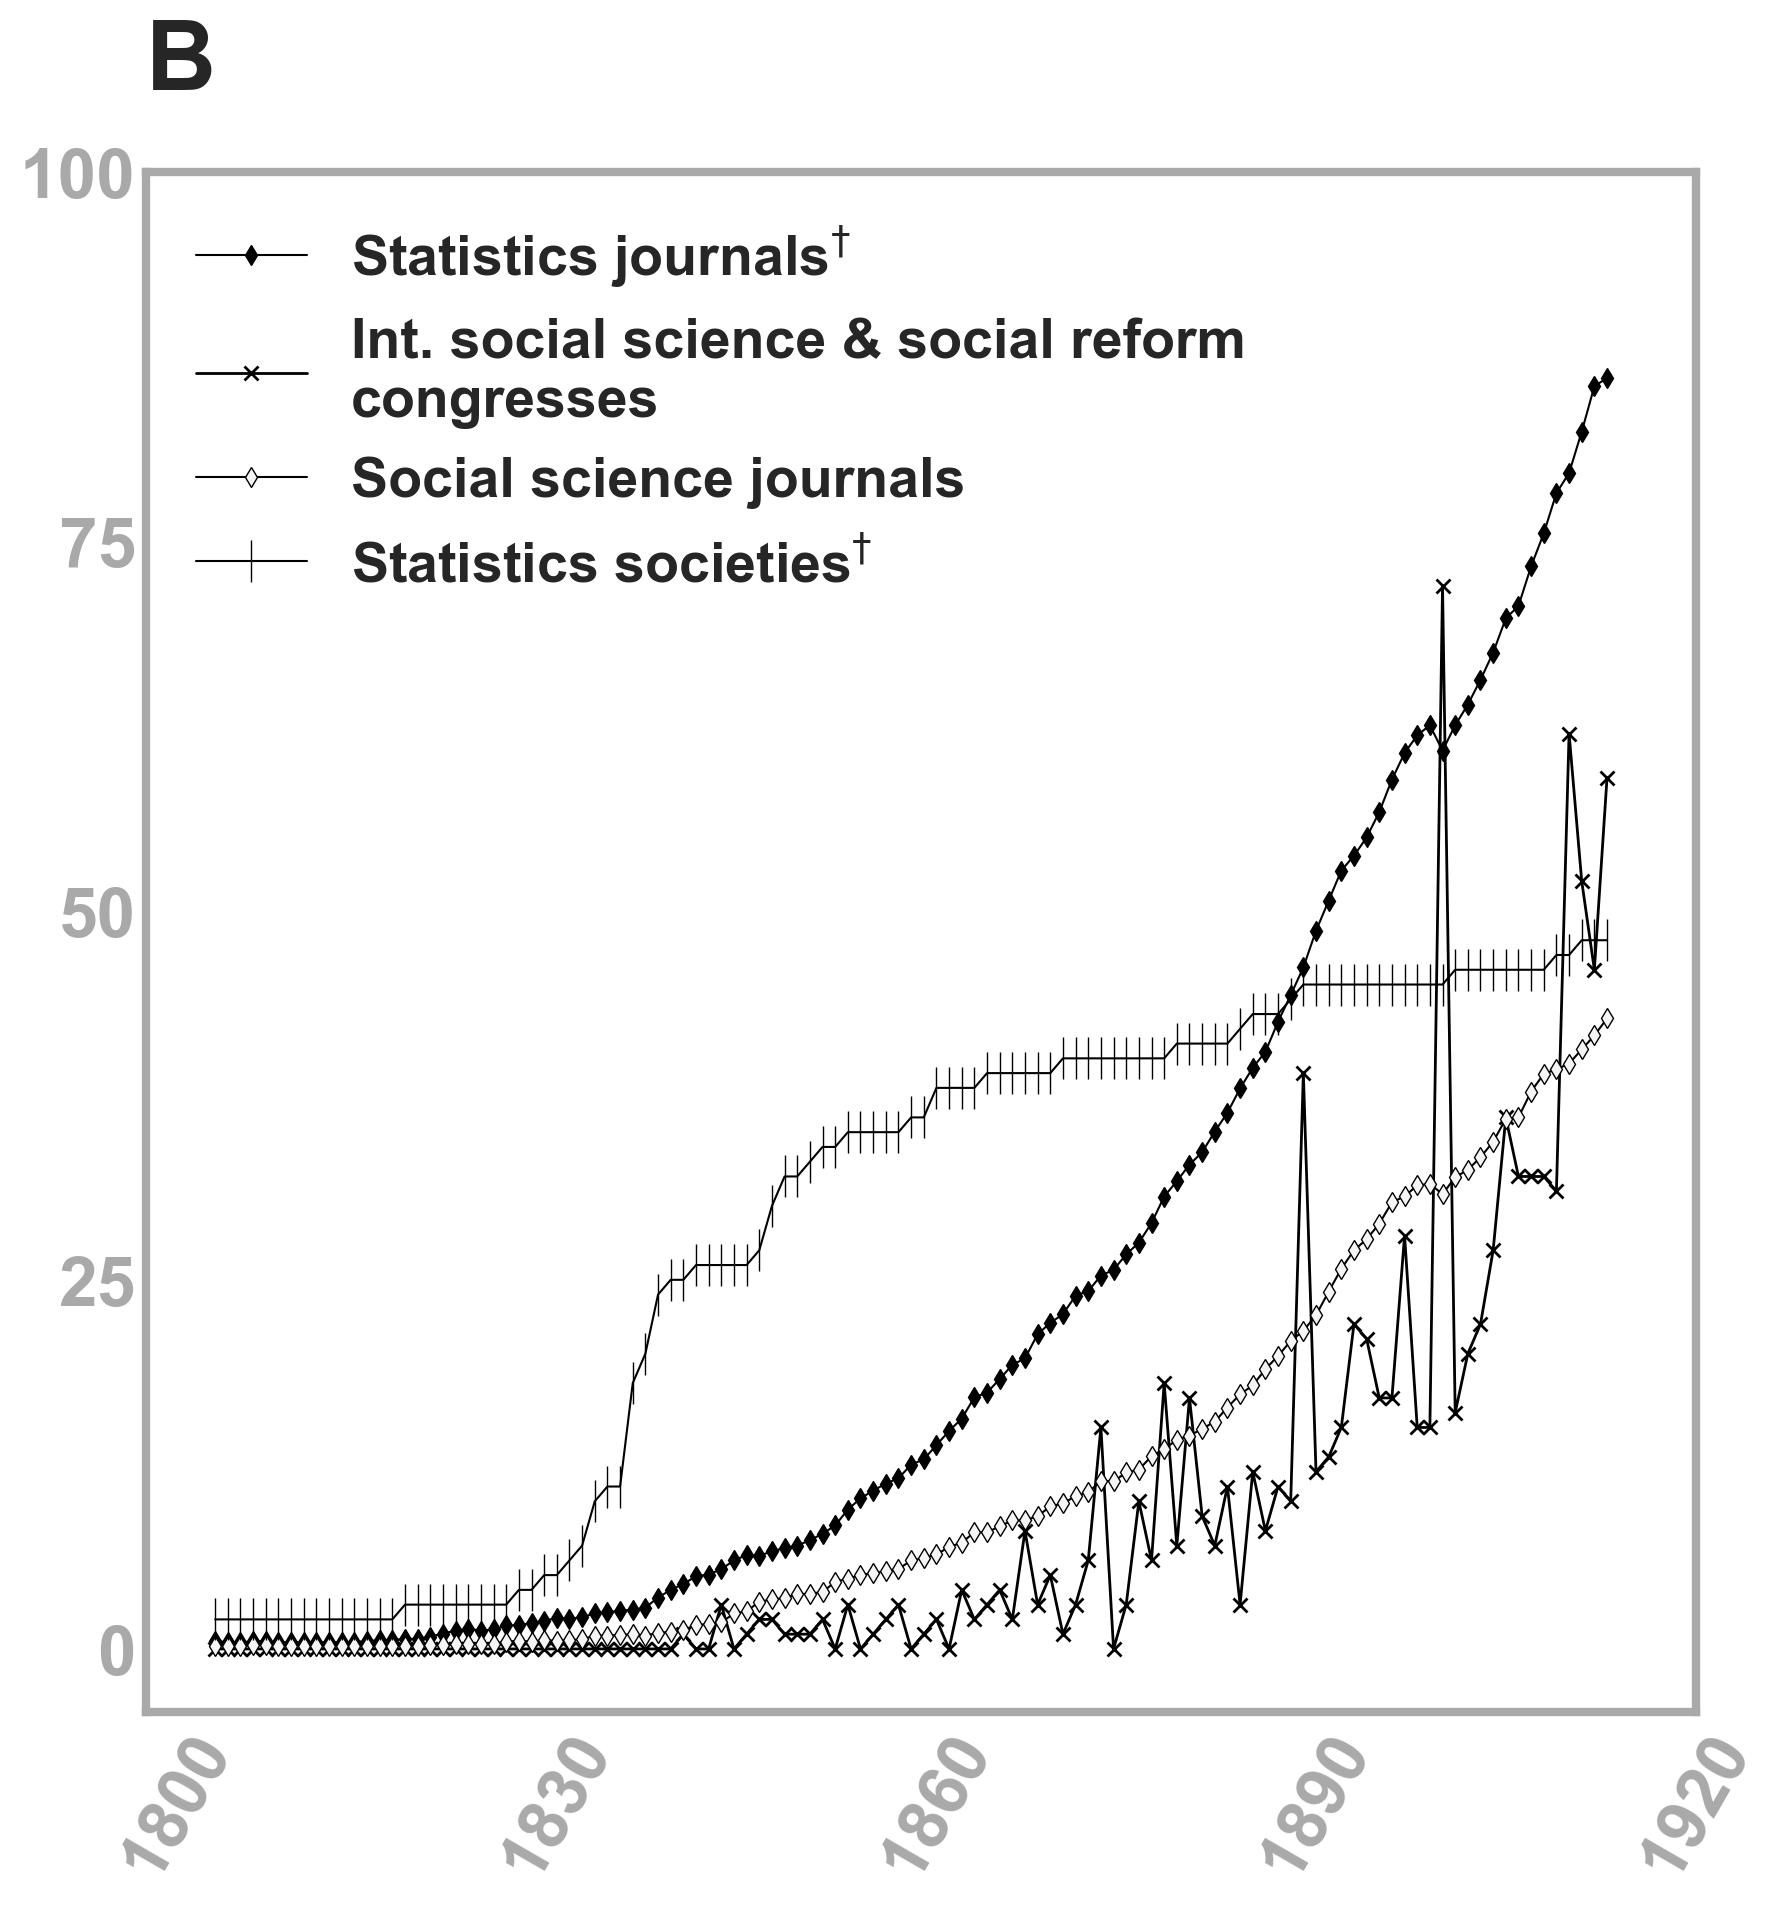

In [12]:
title_color, tick_color, edge_color, data_color = 'black', 'darkgray', 'dimgray', 'whitesmoke'
fig, ax = plt.subplots()
plt.style.use('seaborn-white')
plt.setp(ax.spines.values(), color=tick_color, lw=3)
font_size = 25
font_weight = "bold"

plt.title("B", fontsize=35, weight=font_weight, loc='left', pad=30)
plt.plot(sorted(states_df['year'].unique()), 
         states_df.groupby('year')['wy_stats_journals'].mean()/25,
         lw=.75, 
         marker='d', 
         color=title_color, 
         markersize=5, 
         markeredgewidth=.5, 
         markeredgecolor=title_color,
         markerfacecolor=None,
        )
plt.plot(sorted(states_df['year'].unique()), 
         states_df.groupby('year')['wy_confs_sci_ref'].mean(),
         lw=1, 
         marker='x', 
         color=title_color, 
         markersize=5, 
         markeredgewidth=1, 
         markeredgecolor=title_color, 
        )

plt.plot(sorted(states_df['year'].unique()), 
         states_df.groupby('year')['wy_soc_journals'].mean()/20,
         lw=.75, 
         marker='d', 
         color=title_color, 
         markersize=5, 
         markeredgewidth=.5, 
         markeredgecolor=title_color,
         markerfacecolor=data_color,
        )

plt.plot(sorted(states_df['year'].unique()), 
         states_df.groupby('year')['wy_societies'].mean(),
         lw=.75, 
         marker='|', 
         color=title_color, 
         markersize=15, 
         markeredgewidth=.5, 
         markeredgecolor=title_color,
         markerfacecolor=data_color,
        )
plt.xticks(range(1800,1921, 30),
           fontsize=25,
           color=tick_color, 
           weight=font_weight,
          rotation = 60);

plt.yticks(range(0,101, 25),
           fontsize=25, 
           color=tick_color, 
           weight=font_weight);

plt.legend(['Statistics journals$^{†}$' ,
            'Int. social science & social reform\ncongresses',
            'Social science journals', 
            'Statistics societies$^{†}$'],
          loc='upper left',
          prop={'size': 20, 'weight': 'bold'});

In [20]:
import numpy as np
np.polyval(a, b) 

In [42]:
def fitted_y(x, y, exp):
    p = np.polyfit(x, y, exp)
    return np.polyval(p, x)

In [70]:
states_df['sy_model'] = (states_df['sy_nat_state'] + states_df['sy_sci_state']) / 2

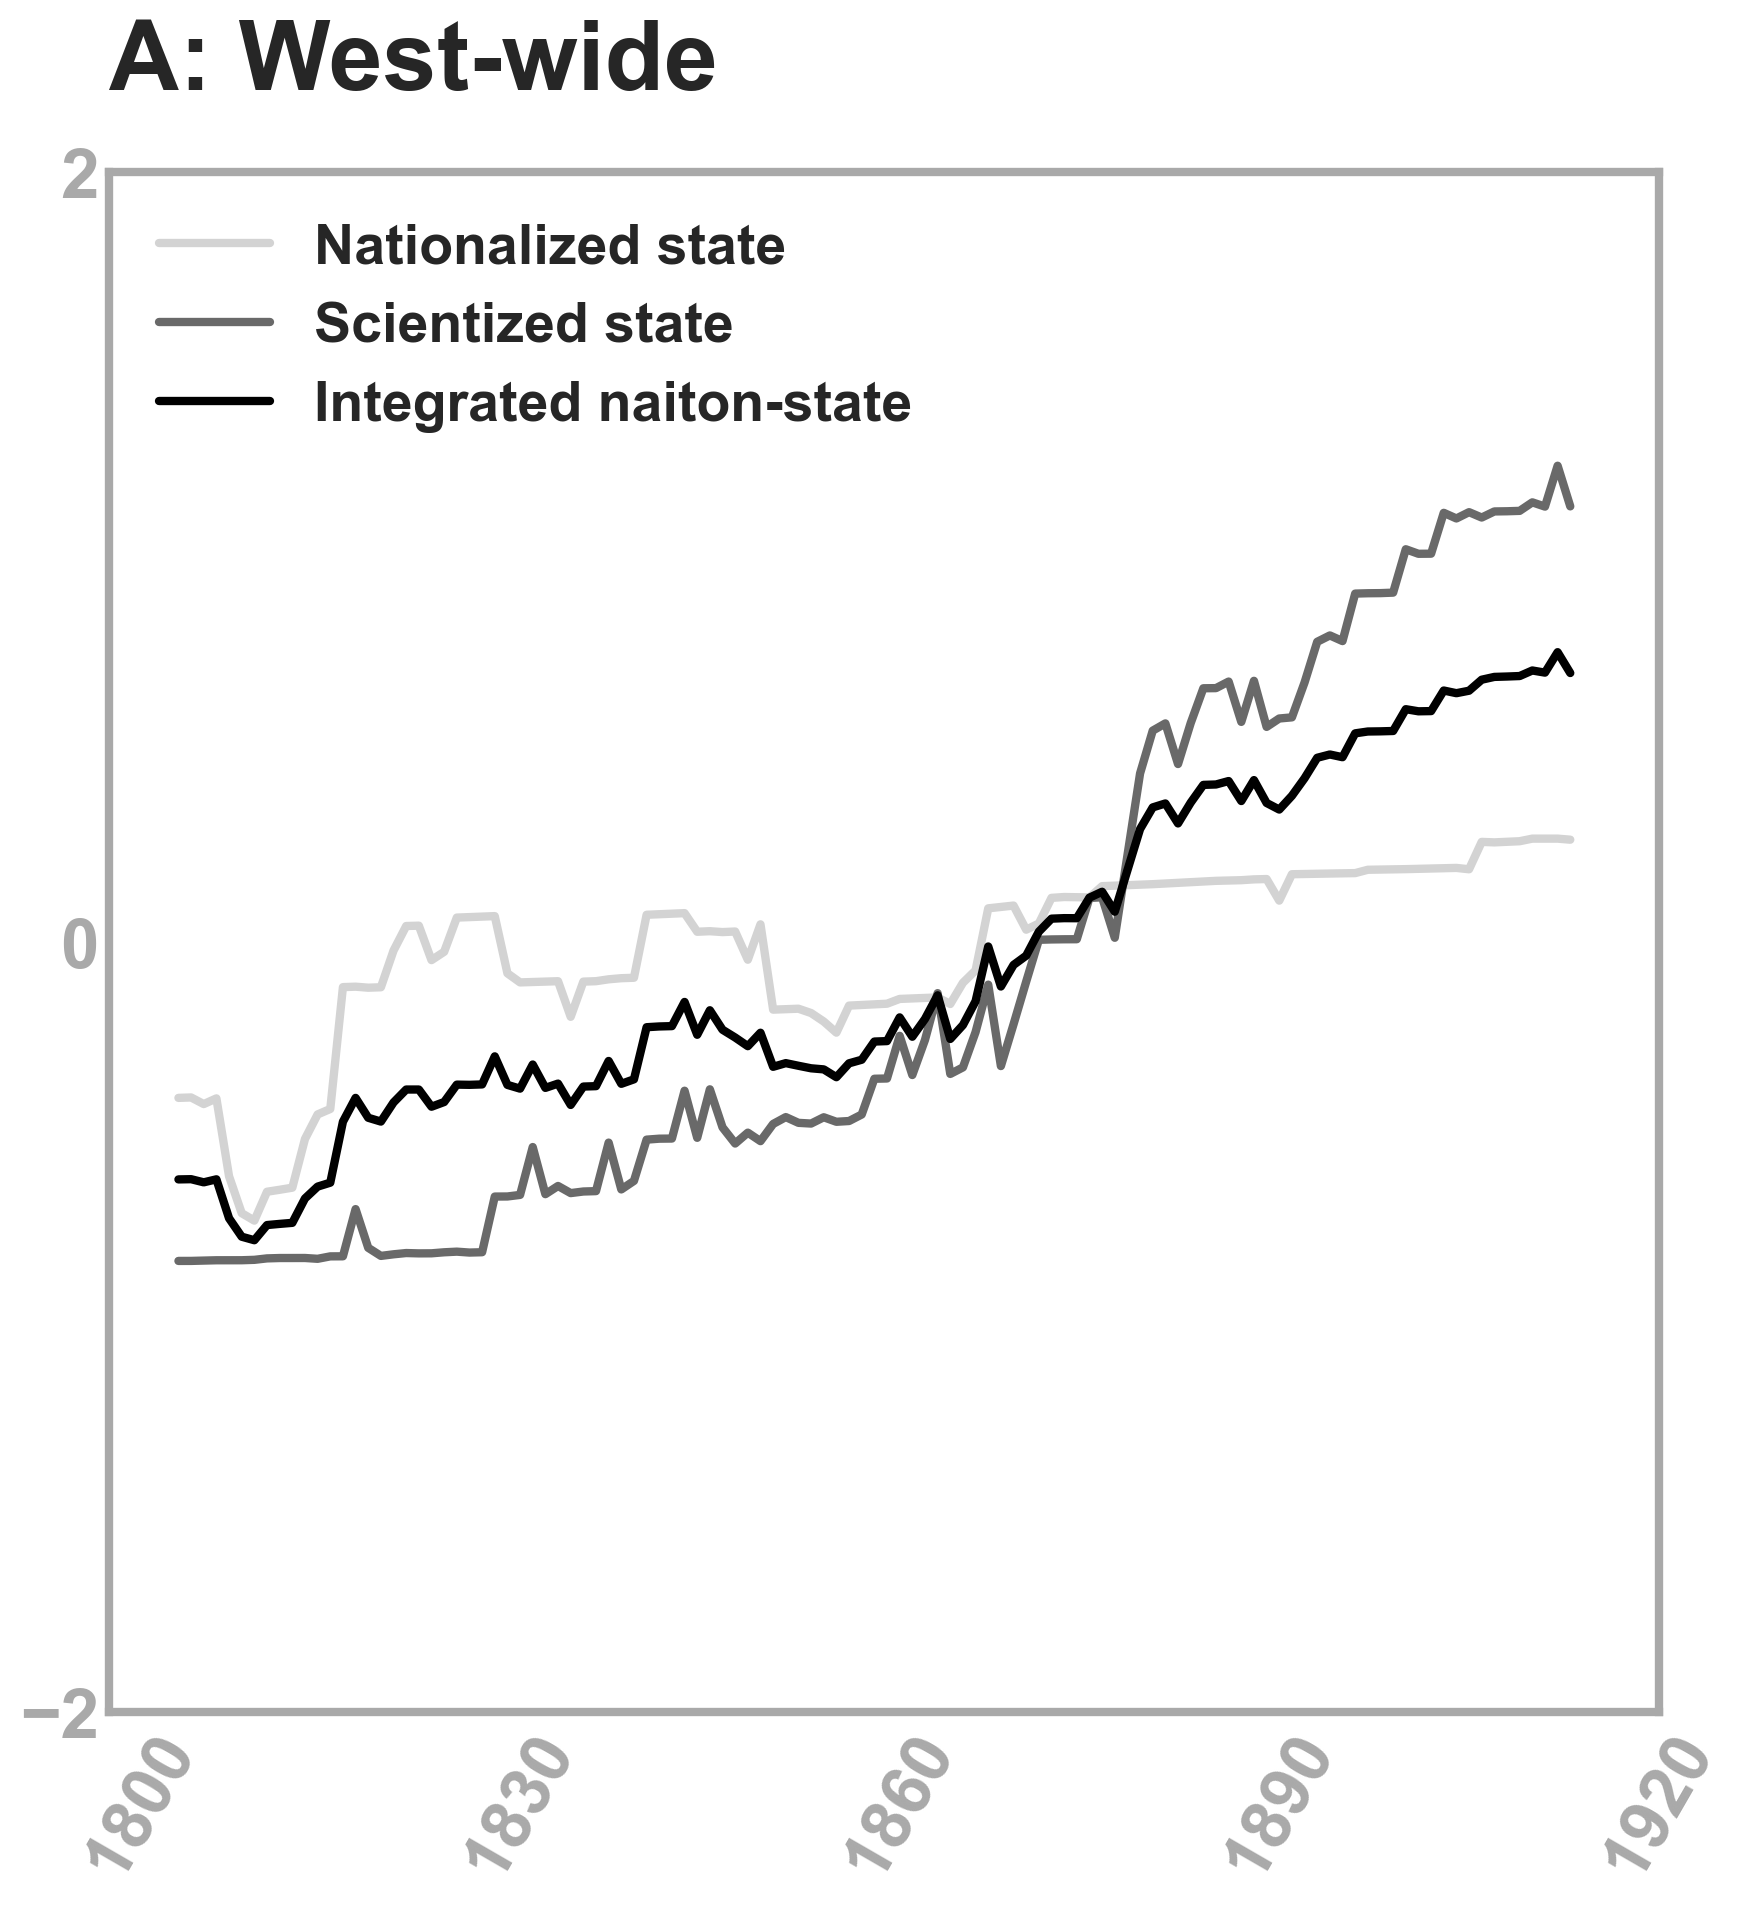

In [72]:
title_color, tick_color, edge_color, data_color = 'black', 'darkgray', 'dimgray', 'whitesmoke'
fig, ax = plt.subplots()
plt.style.use('seaborn-white')
plt.setp(ax.spines.values(), color=tick_color, lw=3)
font_size = 25
font_weight = "bold"
plt.title("A: West-wide", fontsize=35, weight=font_weight, loc='left', pad=30)


x = sorted(states_df['year'].unique())
plt.plot(x, 
         states_df.groupby('year')['sy_nat_state'].mean(),
         lw=3, 
         marker=None, 
         color='lightgray', 
        )
plt.plot(x, 
         states_df.groupby('year')['sy_sci_state'].mean(),
         lw=3, 
         marker=None, 
         color=edge_color, 
        )
plt.plot(x, 
         states_df.groupby('year')['sy_model'].mean(),
         lw=3, 
         marker=None, 
         color=title_color, 
        )
plt.xticks(range(1800,1921, 30),
           fontsize=25,
           color=tick_color, 
           weight=font_weight,
          rotation = 60);

plt.yticks(range(-2,4, 2),
           fontsize=25, 
           color=tick_color, 
           weight=font_weight);

plt.legend(['Nationalized state',
            'Scientized state',
            'Integrated naiton-state'],
          loc='upper left',
          prop={'size': 20, 'weight': 'bold'});

In [73]:
plot = 'A'
for state in sorted(states_df['state'].unique()):
    plot = chr(ord(plot)+1)
    title_color, tick_color, edge_color, data_color = 'black', 'darkgray', 'dimgray', 'whitesmoke'
    fig, ax = plt.subplots()
    plt.style.use('seaborn-white')
    plt.setp(ax.spines.values(), color=tick_color, lw=3)
    font_size = 25
    font_weight = "bold"
    
    state_df = states_df[states_df['state'] == state]
    plt.title(f"{plot}: {state}", fontsize=35, weight=font_weight, loc='left', pad=30)
    
    plt.plot(sorted(state_df['year'].unique()), 
             state_df['sy_nat_state'],
             lw=3, 
             marker=None, 
             color='lightgray', 
            )
    plt.plot(sorted(state_df['year'].unique()), 
             state_df['sy_sci_state'],
             lw=3, 
             marker=None, 
             color=edge_color, 

            )
    plt.plot(sorted(state_df['year'].unique()), 
             state_df['sy_model'],
             lw=3, 
             marker=None, 
             color=title_color, 

            )

    plt.xticks(range(1800,1921, 60),
               fontsize=25,
               color=tick_color, 
               weight=font_weight,
              rotation = 60);

    plt.yticks(range(-2,4, 2),
           fontsize=25, 
           color=tick_color, 
           weight=font_weight);

    plt.legend(['Nationalized state',
                'Scientized state',
                'Integrated nation-state'],
              prop={'size': 20, 'weight': 'bold'});
    
    plt.savefig(FIG + f'{state}.pdf',
                pad_inches=0.25,
                bbox_inches = "tight");
    plt.close()

In [122]:
plt.rc('axes', edgecolor=tick_color)
plt.rc('xtick', color=tick_color)
plt.rc('ytick', color=tick_color)

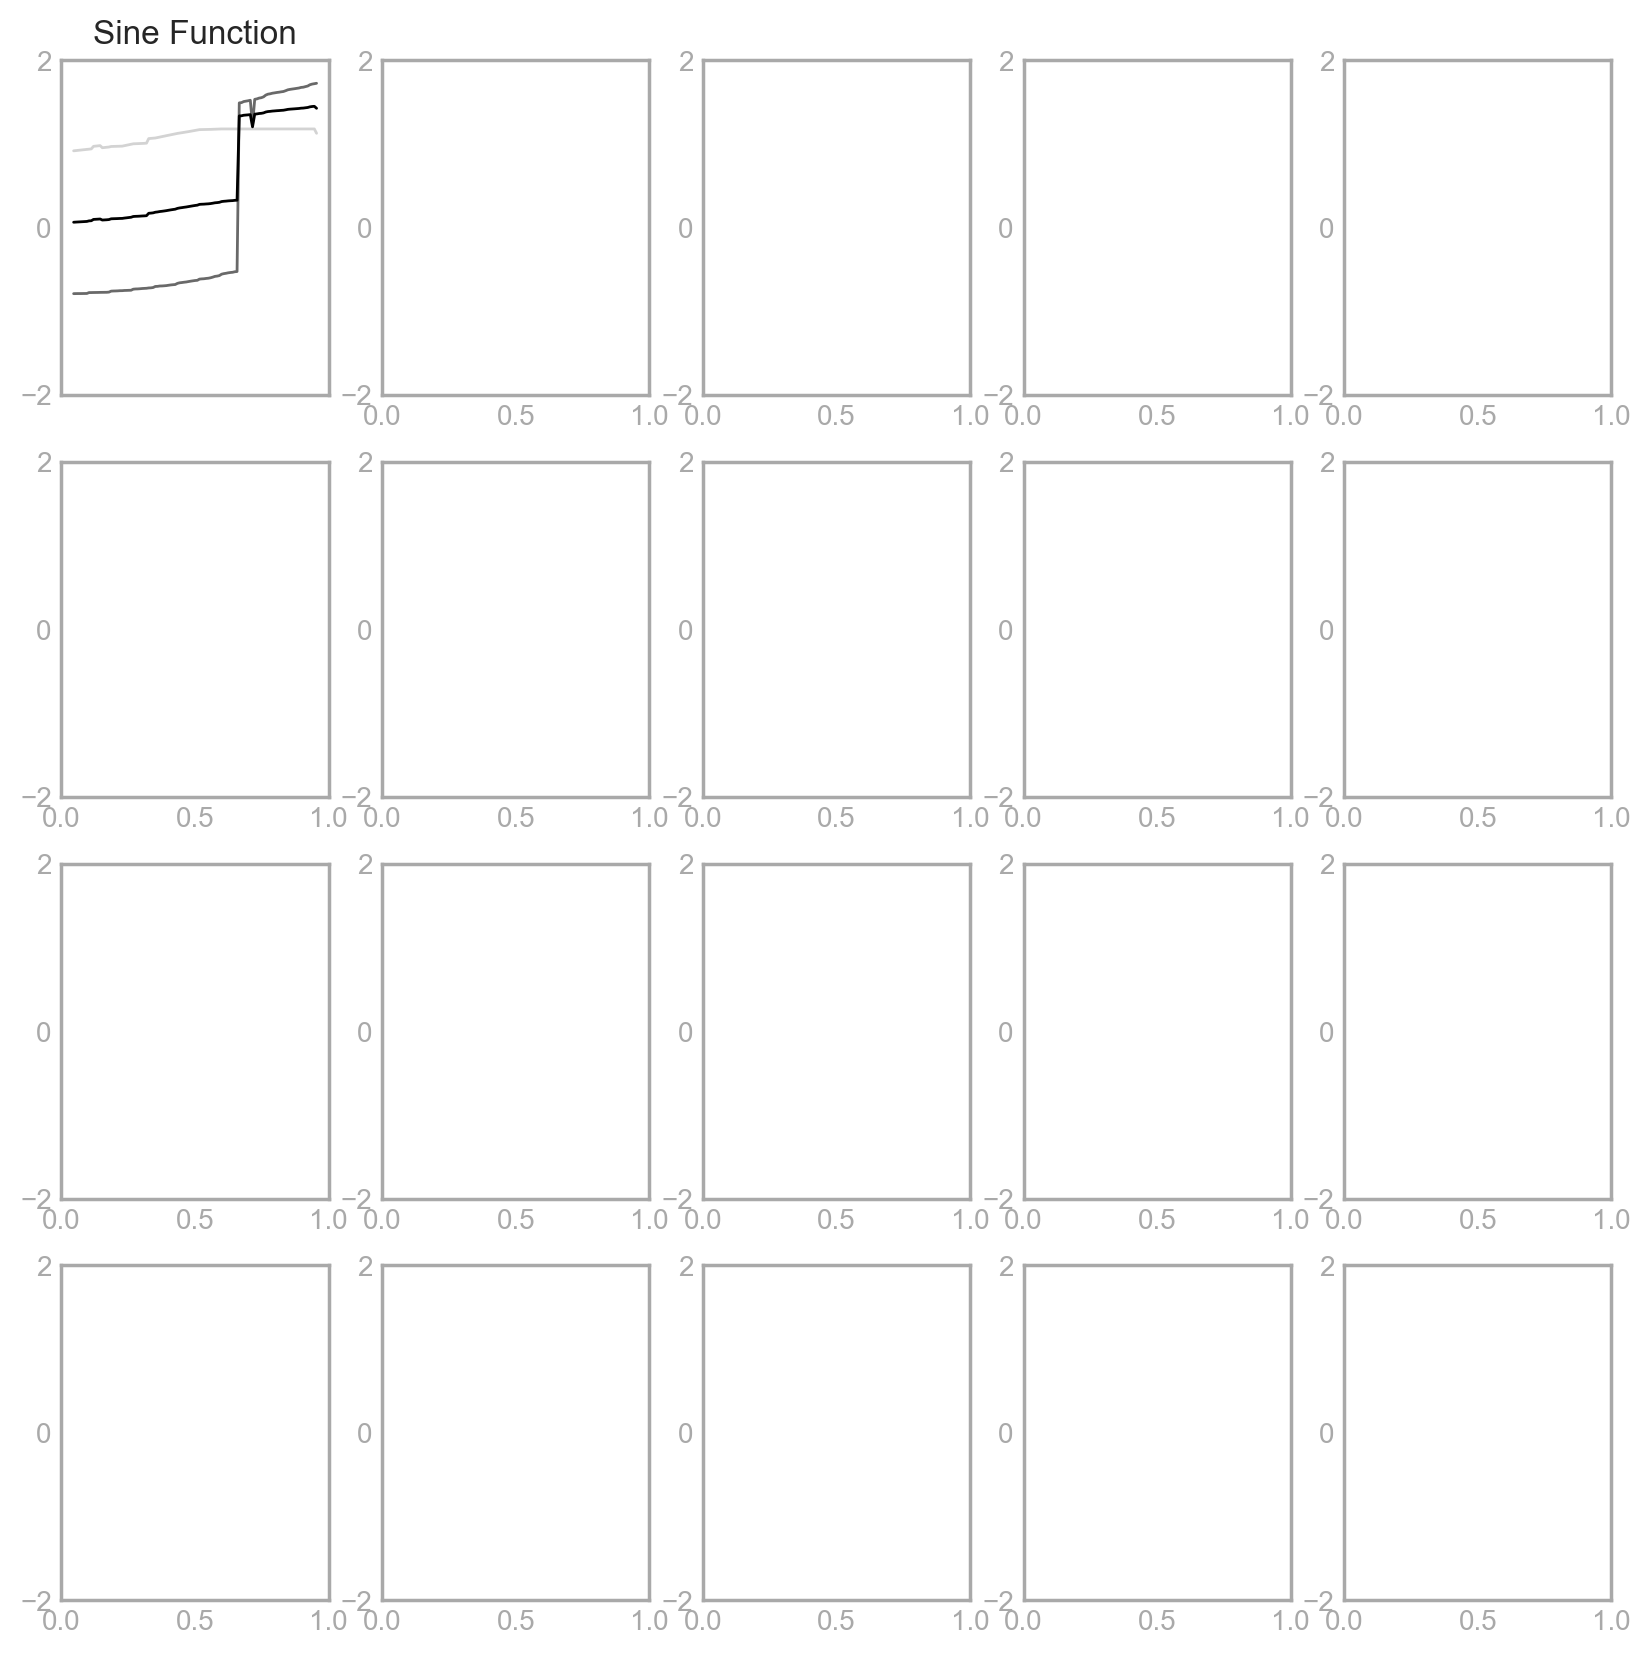

In [130]:
title_color, tick_color, edge_color, data_color = 'black', 'darkgray', 'dimgray', 'whitesmoke'

# Get the angles from 0 to 2 pie (360 degree) in narray object
X = sorted(state_df['year'].unique())
Y1 = state_df['sy_nat_state']
Y2 = state_df['sy_sci_state']
Y3 = state_df['sy_model']
# Using built-in trigonometric function we can directly plot
# the given cosine wave for the given angles

  
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(4, 5)
  
plot = 'A'
for state in sorted(states_df['state'].unique()):
    plot = chr(ord(plot)+1)
    axis[0, 0].plot(X, 
                    Y1,
                    lw=1,
                    marker=None,
                    color='lightgray'
                   )
    axis[0, 0].plot(X, Y2,
                    lw=1,
                    marker=None,
                    color=edge_color
                   )
    axis[0, 0].plot(X, Y3,
                    lw=1,
                    marker=None,
                    color=title_color
                   )

    axis[0, 0].set_title("Sine Function")
    axis[0, 0].set_xticklabels([], rotation=45)

# Combine all the operations and display
plt.setp(axis, 
         # xticks=range(1800,1921, 60), 
         yticks=range(-2,4, 2))


plt.show()

In [ ]:
# import sys
# from PIL import Image

# images = [Image.open(x) for x in ['Test1.jpg', 'Test2.jpg', 'Test3.jpg']]
# widths, heights = zip(*(i.size for i in images))

# total_width = sum(widths)
# max_height = max(heights)

# new_im = Image.new('RGB', (total_width, max_height))

# x_offset = 0
# for im in images:
#   new_im.paste(im, (x_offset,0))
#   x_offset += im.size[0]

# new_im.save('test.jpg')